Import relevant libraries

In [1]:
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from numpy import reshape
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.random_projection import GaussianRandomProjection

Load MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
test_mnist = reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])

11490434/11490434 [==============================] - 0s 0us/step


Standardize data

In [3]:
scaler = StandardScaler()
scaler.fit(test_mnist)
test_mnist = scaler.transform(test_mnist)

scaler = StandardScaler()
scaler.fit(train_mnist)
train_mnist = scaler.transform(train_mnist)

Transform the data to dimensionality n using different dimensionality reduction techniques

In [4]:
acc_list_1 = []
acc_list_2 = []
dim_list = []

dims = [2, 100, 200, 300, 400, 500, 600, 700, 784]
for i in dims:
    # PCA projection on n components for training data
    pca = PCA(n_components=i)
    transformed_train_data_1 = pca.fit_transform(train_mnist)
    transformed_test_data_1 = pca.transform(test_mnist)

    grp = GaussianRandomProjection(n_components=i)
    transformed_train_data_2 = grp.fit_transform(train_mnist)
    transformed_test_data_2 = grp.transform(test_mnist)

    lsvc_1 = LinearSVC(verbose=0)
    lsvc_2 = LinearSVC(verbose=0)
    lsvc_3 = LinearSVC(verbose=0)

    LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

    lsvc_1.fit(transformed_train_data_1, y_train)
    y_pred_1 = lsvc_1.predict(transformed_test_data_1)

    lsvc_2.fit(transformed_train_data_2, y_train)
    y_pred_2 = lsvc_2.predict(transformed_test_data_2)

    accscore_1 = accuracy_score(y_test, y_pred_1, normalize=True)
    accscore_2 = accuracy_score(y_test, y_pred_2, normalize=True)
    print(accscore_1)
    print(accscore_2)
    acc_list_1.append(accscore_1)
    acc_list_2.append(accscore_2)
    dim_list.append(i)

print(*acc_list_1, sep=", acc: ")
print(*acc_list_2, sep=", acc: ")
print(*dim_list, sep=", dim: ")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.3205
0.195


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9067
0.8469


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9119
0.8922


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9137
0.9062


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9113
0.9062


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9127
0.913


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9136
0.9103


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9113
0.912


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9099
0.911
0.3205, acc: 0.9067, acc: 0.9119, acc: 0.9137, acc: 0.9113, acc: 0.9127, acc: 0.9136, acc: 0.9113, acc: 0.9099
0.195, acc: 0.8469, acc: 0.8922, acc: 0.9062, acc: 0.9062, acc: 0.913, acc: 0.9103, acc: 0.912, acc: 0.911
2, dim: 100, dim: 200, dim: 300, dim: 400, dim: 500, dim: 600, dim: 700, dim: 784


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Plot the accuracy for the different dimensionality reduction techniques

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9125


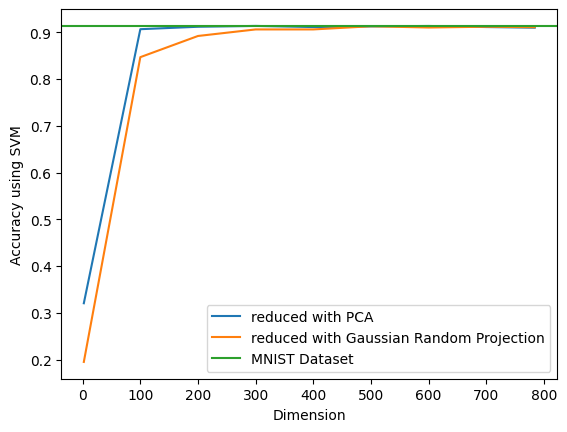

In [5]:
plt.plot(dim_list, acc_list_1, label='reduced with PCA')
plt.plot(dim_list, acc_list_2, label='reduced with Gaussian Random Projection')

lsvc_3.fit(train_mnist, y_train)
y_pred_3 = lsvc_3.predict(test_mnist)

print(accuracy_score(y_test, y_pred_3, normalize=True))

plt.axhline(accuracy_score(y_test, y_pred_3, normalize=True), label ='MNIST Dataset', color='#2ca02c')
plt.xlabel("Dimension")
plt.ylabel("Accuracy using SVM")
plt.legend()
plt.show()